<a href="https://colab.research.google.com/github/daniel-menna/black-littermann-python/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install PyPortfolioOpt

In [ ]:
#Grab Data
import yfinance as yf

#Usual Suspects
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Use PyPortfolioOpt for Calculations
from pypfopt import EfficientFrontier, objective_functions
from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting
from pypfopt import DiscreteAllocation

In [ ]:
#Create a Portfolio
symbols = ['ALOS3',
'ABEV3',
'ASAI3',
'AURE3',
'AZZA3',
'B3SA3',
'BBSE3',
'BBDC3',
'BBDC4',
'BRAP4',
'BBAS3',
'BRKM5',
'BRAV3',
'BRFS3',
'BPAC11',
'CXSE3',
'CEAB3',
'CMIG4',
'COGN3',
'CPLE6',
'CSAN3',
'CPFE3',
'CMIN3',
'CURY3',
'CVCB3',
'CYRE3',
'DIRR3',
'ELET3',
'ELET6',
'EMBR3',
'ENGI11',
'ENEV3',
'EGIE3',
'EQTL3',
'FLRY3',
'GGBR4',
'GOAU4',
'HAPV3',
'HYPE3',
'IGTI11',
'IRBR3',
'ISAE4',
'ITSA4',
'ITUB4',
'KLBN11',
'RENT3',
'LREN3',
'MGLU3',
'POMO4',
'MRFG3',
'BEEF3',
'MOTV3',
'MRVE3',
'MULT3',
'NATU3',
'PCAR3',
'PETR3',
'PETR4',
'RECV3',
'PRIO3',
'PSSA3',
'RADL3',
'RAIZ4',
'RDOR3',
'RAIL3',
'SBSP3',
'SANB11',
'STBP3',
'CSNA3',
'SLCE3',
'SMFT3',
'SUZB3',
'TAEE11',
'VIVT3',
'TIMS3',
'TOTS3',
'UGPA3',
'USIM5',
'VALE3',
'VAMO3',
'VBBR3',
'VIVA3',
'WEGE3',
'YDUQ3'
]

In [ ]:
#Get the stock data
portfolio = yf.download(symbols, start="2020-01-01", end="2025-07-31")['Close']

portfolio.head()

/tmp/ipykernel_9581/1205391635.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  portfolio = yf.download(symbols, start="2020-01-01", end="2025-07-31")['Close']
[**********            20%                       ]  4 of 20 completed

[*********************100%***********************]  20 of 20 completed


Ticker,AAPL,ABBV,AMZN,CAT,DIS,F,HD,HSY,JNJ,KO,LMT,MAR,META,MSFT,O,T,UNH,UPS,V,XOM
Date,,,,,,,,,,,,,,,,,,,,
2020-01-02,72.538521,70.326836,94.900497,133.256729,145.769913,7.109194,191.218201,126.051056,124.072998,46.419701,341.965179,145.857452,208.635391,152.791122,53.112076,19.413134,268.711121,93.547050,183.549072,54.131073
2020-01-03,71.833282,69.659271,93.748497,131.406555,144.097778,6.950708,190.582703,127.189301,122.636520,46.166451,354.269714,143.720016,207.531479,150.888611,54.072014,19.513048,265.991791,93.490997,182.089279,53.695892
2020-01-06,72.405670,70.209030,95.143997,131.317993,143.261734,6.912975,191.479401,126.585197,122.483475,46.149567,353.730194,141.861755,211.440033,151.278580,54.343159,19.533033,267.838257,93.074478,181.695572,54.108170
2020-01-07,72.065140,69.808502,95.343002,129.582932,143.310898,6.980897,190.225800,126.830322,123.231499,45.795025,354.920410,139.550995,211.897522,149.899307,54.357784,19.607965,266.221497,92.914276,181.215317,53.665344
2020-01-08,73.224411,70.303261,94.598503,130.733719,143.015808,6.980897,193.072403,127.872292,123.214493,45.879440,351.949158,141.274429,214.045731,152.286972,54.606949,19.667915,271.834473,93.442932,184.317383,52.856052


In [ ]:
#SP500 ETF Benchmark
market_prices = yf.download("SPY", start='2020-01-01', end='2025-07-31')['Close']
market_prices.head()

/tmp/ipykernel_9581/2171132611.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  market_prices = yf.download("SPY", start='2020-01-01', end='2025-07-31')['Close']
[*********************100%***********************]  1 of 1 completed


Ticker,SPY
Date,
2020-01-02,299.406372
2020-01-03,297.139252
2020-01-06,298.272888
2020-01-07,297.434174
2020-01-08,299.019409


In [ ]:
#Grap Market Capitalization for each stock in portfolio
mcaps = {}
for t in symbols:
    stock = yf.Ticker(t)
    mcaps[t] = stock.info["marketCap"]
mcaps

{'AAPL': 3558430998528,
 'MSFT': 3775827279872,
 'META': 1880713723904,
 'AMZN': 2513503518720,
 'XOM': 479189303296,
 'UNH': 281103106048,
 'JNJ': 430514831360,
 'V': 681250521088,
 'HD': 409790873600,
 'ABBV': 376277270528,
 'KO': 293725470720,
 'DIS': 213612052480,
 'T': 211508527104,
 'UPS': 71602716672,
 'LMT': 106658480128,
 'CAT': 196864245760,
 'F': 46484766720,
 'MAR': 72981479424,
 'O': 53285752832,
 'HSY': 37564755968}

## Step 2: Getting Priors

In [ ]:
#Calculate Sigma and Delta to get implied market returns
#Ledoit-Wolf is a particular form of shrinkage, where the shrinkage coefficient is computed using O?
S = risk_models.CovarianceShrinkage(portfolio).ledoit_wolf()

delta = black_litterman.market_implied_risk_aversion(market_prices)
delta

np.float64(3.483272686268057)

<Axes: xlabel='Ticker', ylabel='Ticker'>

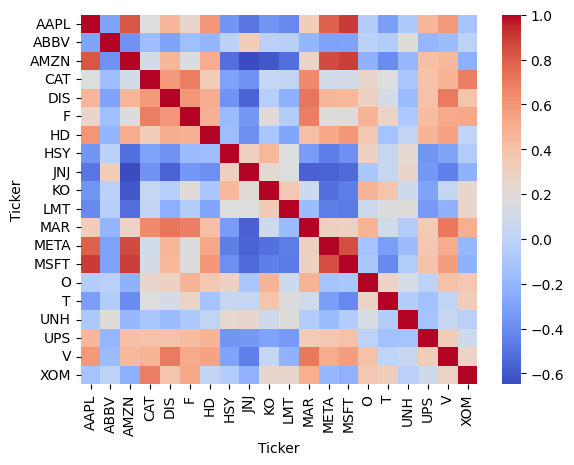

In [ ]:
#Visualize the Covariant Correlation
sns.heatmap(S.corr(), cmap='coolwarm')

In [ ]:
market_prior = black_litterman.market_implied_prior_returns(mcaps, delta, S)
market_prior

Ticker
AAPL    0.244568
ABBV    0.079512
AMZN    0.250354
CAT     0.132146
DIS     0.170434
F       0.168280
HD      0.158570
HSY     0.072681
JNJ     0.065315
KO      0.080575
LMT     0.071855
MAR     0.162258
META    0.297785
MSFT    0.235321
O       0.110241
T       0.077672
UNH     0.113888
UPS     0.138659
V       0.163294
XOM     0.104268
dtype: float64

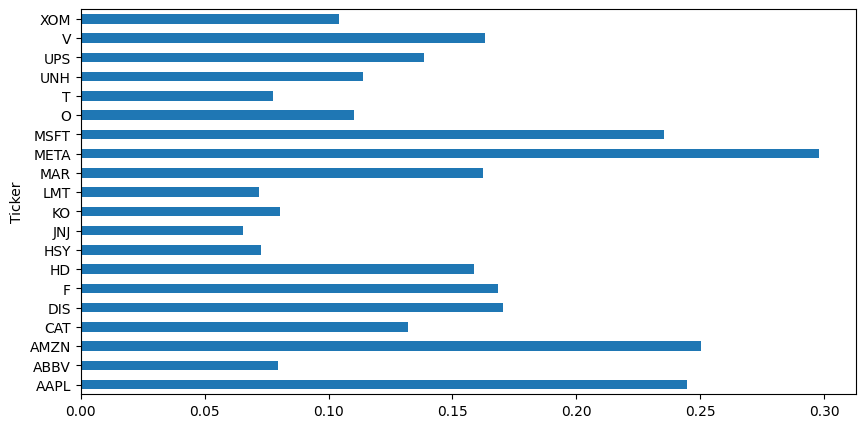

In [ ]:
#What am I looking at here?
market_prior.plot.barh(figsize=(10,5));

## Step 3: Integrating Views

In [ ]:
#You don't have to provide views on all the assets
viewdict = {
    'AAPL':0.10,
    'MSFT':0.10,
    'META':0.05,
    'AMZN':0.30,
    'XOM':0.02,
    'UNH':0.01,
    'JNJ':0.15,
    'V':0.09,
    'HD':0.16,
    'ABBV':0.07,
    'KO':0.01,
    'DIS':-0.23,
    'T':0.16,
    'UPS':0.10,
    'LMT':-0.09,
    'CAT':0.30,
    'F':0.16,
    'MAR':-0.08,
    'O':0.30,
    'HSY':-0.26
}

bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict)

### Creating Confidences

we can calculate the uncertainty matrix directly by specifying 1 standard deviation confidence intervals, i.e bounds which we think will contain the true return 68% of the time. This may be easier than coming up with somewhat arbitrary percentage confidences

In [ ]:
intervals = [
    (0, 0.25),
    (0.1, 0.4),
    (-0.1, 0.15),
    (-0.05, 0.1),
    (0.15, 0.25),
    (-0.1, 0),
    (0.1, 0.2),
    (0.08, 0.12),
    (0.1, 0.9),
    (0, 0.3),
    (0, 0.25),
    (0.1, 0.4),
    (-0.1, 0.15),
    (-0.05, 0.1),
    (0.15, 0.25),
    (-0.1, 0),
    (0.1, 0.2),
    (0.08, 0.12),
    (0.1, 0.9),
    (0, 0.3),
]

In [ ]:
variances = []
for lb, ub in intervals:
    sigma = (ub - lb)/2
    variances.append(sigma ** 2)

print(variances)
omega = np.diag(variances)

[0.015625, 0.022500000000000006, 0.015625, 0.0056250000000000015, 0.0025000000000000005, 0.0025000000000000005, 0.0025000000000000005, 0.00039999999999999986, 0.16000000000000003, 0.0225, 0.015625, 0.022500000000000006, 0.015625, 0.0056250000000000015, 0.0025000000000000005, 0.0025000000000000005, 0.0025000000000000005, 0.00039999999999999986, 0.16000000000000003, 0.0225]


# Step 4: Calculate Posterior Estimate Returns

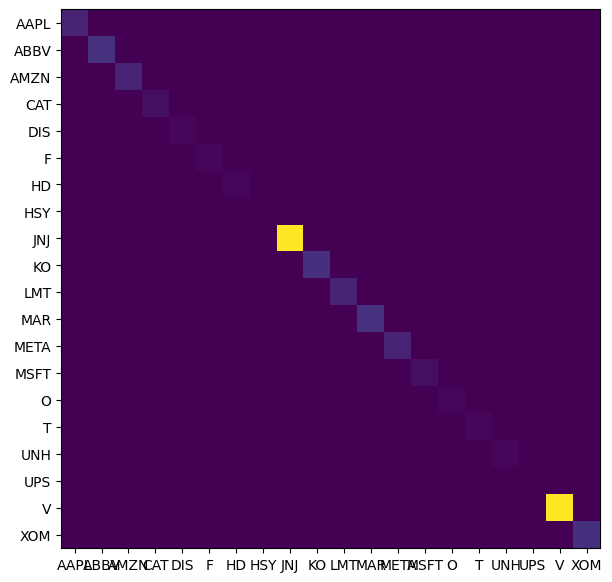

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(omega)

# We want to show all ticks...
ax.set_xticks(np.arange(len(bl.tickers)))
ax.set_yticks(np.arange(len(bl.tickers)))

ax.set_xticklabels(bl.tickers)
ax.set_yticklabels(bl.tickers)
plt.show()

In [ ]:
# We are using the shortcut to automatically compute market-implied prior
bl = BlackLittermanModel(S, pi="market", market_caps=mcaps, risk_aversion=delta,
                        absolute_views=viewdict, omega=omega)

In [ ]:
# Posterior estimate of returns
ret_bl = bl.bl_returns()
ret_bl

Ticker
AAPL    0.172989
ABBV    0.061689
AMZN    0.223986
CAT     0.185741
DIS     0.060784
F       0.136092
HD      0.113351
HSY     0.021526
JNJ     0.080525
KO      0.034996
LMT    -0.016981
MAR    -0.063176
META    0.188107
MSFT    0.174235
O       0.023582
T       0.059315
UNH     0.029672
UPS     0.113124
V       0.087758
XOM     0.039335
dtype: float64

In [ ]:
rets_df = pd.DataFrame([market_prior, ret_bl, pd.Series(viewdict)],
             index=["Prior", "Posterior", "Views"]).T
rets_df

,Prior,Posterior,Views
AAPL,0.244568,0.172989,0.10
ABBV,0.079512,0.061689,0.07
AMZN,0.250354,0.223986,0.30
CAT,0.132146,0.185741,0.30
DIS,0.170434,0.060784,-0.23
F,0.168280,0.136092,0.16
HD,0.158570,0.113351,0.16
HSY,0.072681,0.021526,-0.26
JNJ,0.065315,0.080525,0.15
KO,0.080575,0.034996,0.01


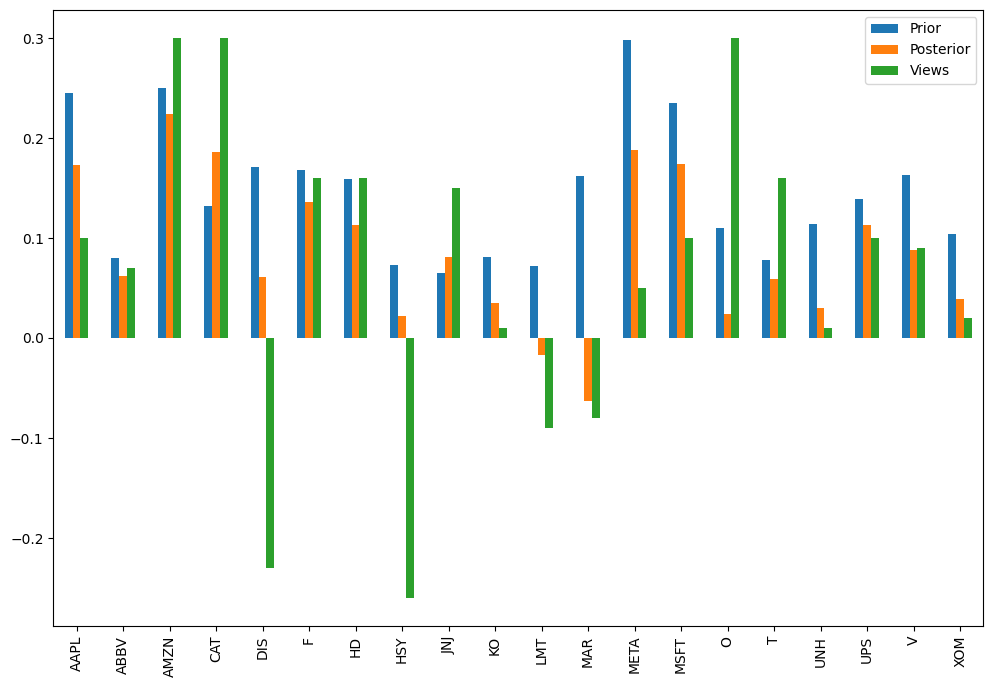

In [ ]:
rets_df.plot.bar(figsize=(12,8));

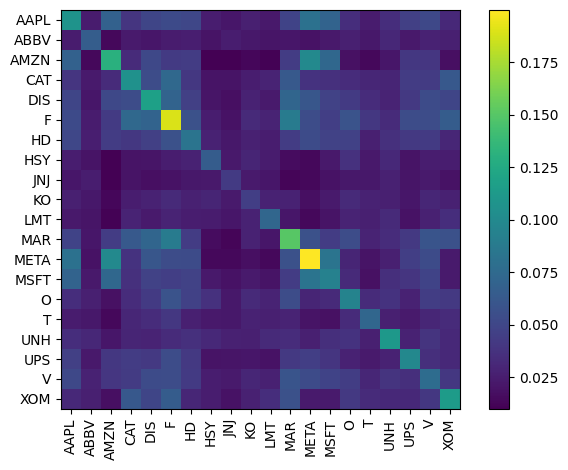

In [ ]:
S_bl = bl.bl_cov()
plotting.plot_covariance(S_bl);

# Step 5: Portfolio Allocation

In [ ]:
ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights = ef.clean_weights()
weights

/usr/local/python/3.12.1/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


OrderedDict([('AAPL', 0.10753),
             ('ABBV', 0.03593),
             ('AMZN', 0.15335),
             ('CAT', 0.13152),
             ('DIS', 0.00923),
             ('F', 0.07131),
             ('HD', 0.0633),
             ('HSY', 0.00048),
             ('JNJ', 0.05803),
             ('KO', 0.01032),
             ('LMT', 0.0),
             ('MAR', 0.0),
             ('META', 0.1068),
             ('MSFT', 0.11132),
             ('O', 0.0),
             ('T', 0.03185),
             ('UNH', 0.0),
             ('UPS', 0.06516),
             ('V', 0.04001),
             ('XOM', 0.00384)])

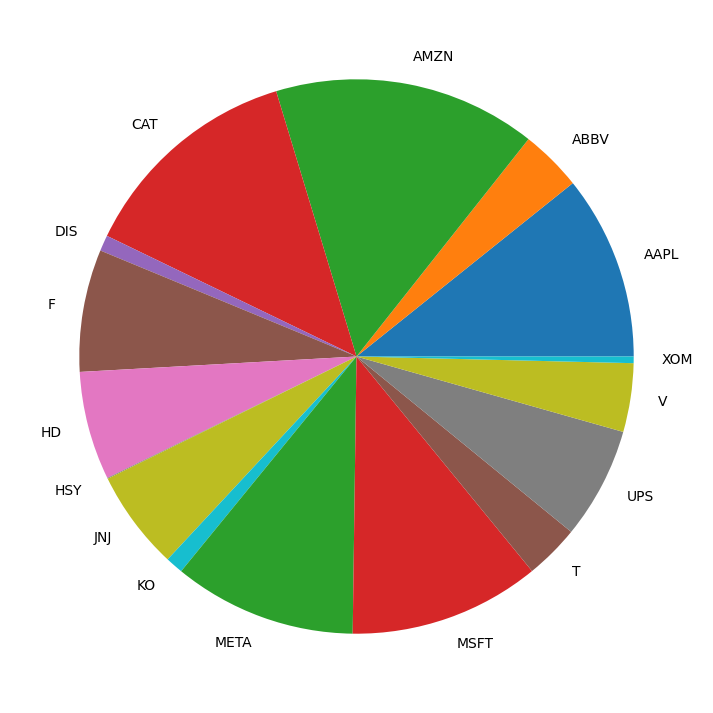

In [ ]:
pd.Series(weights).plot.pie(figsize=(9,9));

Expected annual return: 15.4%
Annual volatility: 22.8%
Sharpe Ratio: 0.68


/usr/local/python/3.12.1/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
/usr/local/python/3.12.1/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


(np.float64(0.1544904182975338),
 np.float64(0.2283475845168718),
 np.float64(0.6765581454447969))

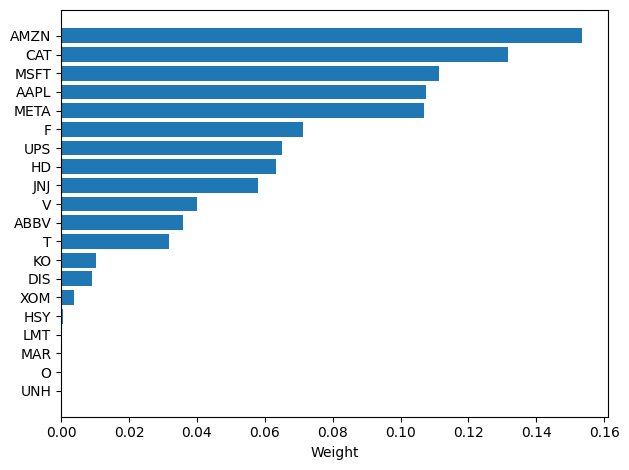

In [ ]:
from pypfopt.plotting import plot_weights

# Maximum Sharpe
ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights = ef.clean_weights()

plot_weights(weights)
ef.portfolio_performance(verbose = True, risk_free_rate = 0.009)